In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# to plot the trees 
from sklearn.tree import plot_tree

pd.set_option('display.max_rows', 200)
from sklearn.preprocessing import StandardScaler

In [2]:
# read data
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


# Data exploration 

In [3]:
# check data types of all columns
print(churnData.dtypes)   

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [4]:
churnData.columns= churnData.columns.str.lower()

In [5]:
print(churnData.dtypes)

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object


## Cleaning Total Charges

In [6]:
#churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges']) error showing " " inside the column

In [7]:
churnData.isnull().values.any()

False

In [8]:
# get rid of "" 
churnData.totalcharges.where(churnData.totalcharges != " " , 0, inplace=True)

In [9]:
sum(churnData.totalcharges == 0)

11

In [10]:
churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges'])

In [11]:
sum(churnData.totalcharges == 0)

11

In [12]:
# calculate and replace with the mean of totalcharges
mean_totalcharges= churnData['totalcharges'].mean()
mean_totalcharges

2279.734303563826

In [13]:
churnData["totalcharges"].replace(0,churnData["totalcharges"].mean(axis=0),inplace=True)

In [14]:
mean_totalcharges

2279.734303563826

<AxesSubplot:xlabel='totalcharges', ylabel='Count'>

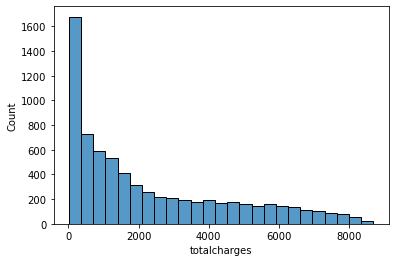

In [15]:
sns.histplot(churnData.totalcharges)

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier model on the training data


In [16]:
print(churnData.dtypes)

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object


# Working on numerical data

In [17]:
numerical = churnData.select_dtypes(np.number)
numerical

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


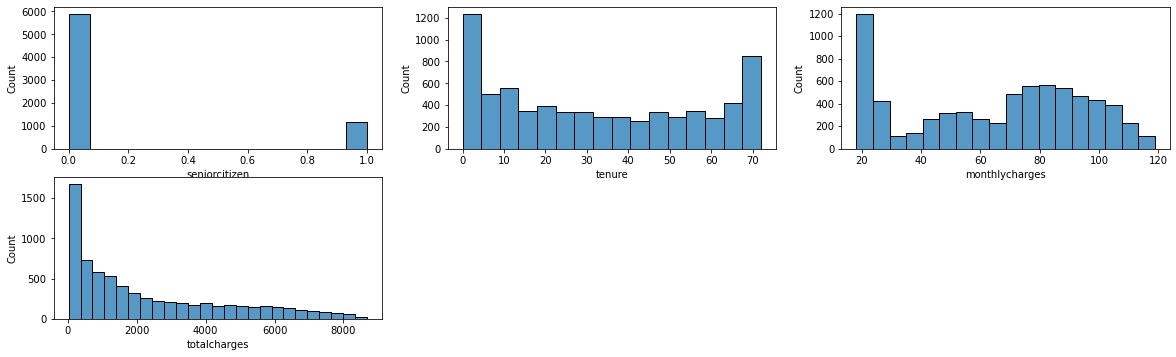

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
for i, column in enumerate(numerical.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(numerical[column])

## Xy Split

In [19]:
X = numerical
y = churnData.iloc[:,-1]

## Log model

### Cross validation

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model= LogisticRegression() 

In [21]:
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.79414374, 0.80479148, 0.81188997, 0.78615794, 0.75666075])

In [22]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.02


In [23]:
y_test

2665     No
5139     No
3885     No
2358     No
4759    Yes
       ... 
5166     No
6186    Yes
840     Yes
2493     No
5426     No
Name: churn, Length: 1409, dtype: object

In [24]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

### Scaling 

In [26]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

X_test_scaled = std_scaler.transform(X_test)

In [27]:
X_train_scaled

array([[-0.44119892, -0.54302112,  1.06773251, -0.23689951],
       [-0.44119892, -1.27649995, -1.47703416, -0.9980817 ],
       [-0.44119892, -0.82826289,  0.36900562, -0.62956532],
       ...,
       [-0.44119892, -0.86901171, -1.51872431, -0.92746725],
       [-0.44119892, -1.23575113,  0.532431  , -0.93668071],
       [-0.44119892, -0.78751406,  0.7859071 , -0.46679416]])

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [29]:
X_train_scaled

,seniorcitizen,tenure,monthlycharges,totalcharges
0,-0.441199,-0.543021,1.067733,-0.236900
1,-0.441199,-1.276500,-1.477034,-0.998082
2,-0.441199,-0.828263,0.369006,-0.629565
3,-0.441199,1.616667,0.132206,1.152919
4,-0.441199,-1.276500,-1.333620,-0.996182
...,...,...,...,...
5629,-0.441199,-1.276500,-1.378645,-0.996778
5630,-0.441199,-1.032007,0.855947,-0.744899
5631,-0.441199,-0.869012,-1.518724,-0.927467
5632,-0.441199,-1.235751,0.532431,-0.936681


### Log model and confusion matrix

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.791622,0.791341
1,Precision,0.667636,0.608696
2,Recall,0.453289,0.441261


Confusion matrix for the train set
[[3771  343]
 [ 831  689]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


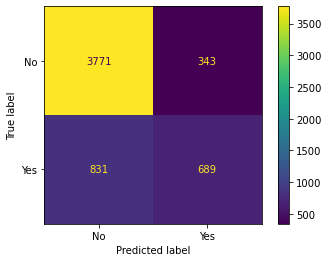



Confusion matrix for the test set
[[961  99]
 [195 154]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


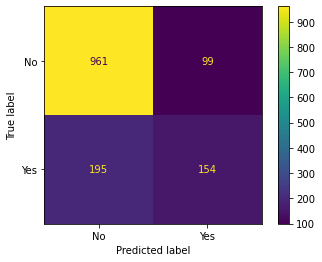

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 
trans = PowerTransformer()

trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN

### Cross validation KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [32]:
scores = cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.74822695, 0.7641844 , 0.7677305 , 0.76595745, 0.75488455,
       0.76909414, 0.78330373, 0.76376554, 0.75133215, 0.75666075])

In [33]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.01


In [34]:
y_test

5665     No
6698     No
1675    Yes
1449     No
503      No
       ... 
212      No
1353     No
5990     No
402     Yes
1502     No
Name: churn, Length: 1409, dtype: object

In [35]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

In [37]:
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges
2149,0,46,101.10,4674.40
5444,0,45,107.75,4882.80
2605,0,13,20.40,261.30
6164,1,45,75.15,3480.35
4499,0,12,78.30,909.25
...,...,...,...,...
3032,0,17,19.45,369.05
4298,0,10,46.00,492.10
2403,0,71,84.80,6046.10
2581,0,10,20.00,198.70


### Modeling

In [38]:
 # n_neighbors = K

,Error_metric,Train,Test
0,Accuracy,0.862975,0.738112
1,Precision,0.779023,0.548589
2,Recall,0.662355,0.437500


Confusion matrix for the train set
[[3889  276]
 [ 496  973]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


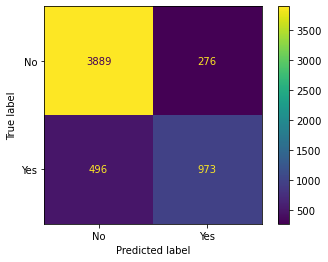



Confusion matrix for the test set
[[823 186]
 [333  67]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


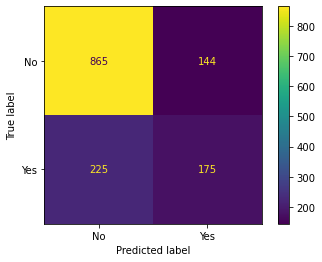

In [39]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_knn,pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_knn, pos_label="Yes")]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

Round 2
- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

## Decision Tree Classifier

### Cross validation 

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [41]:
scores = cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.78498986, 0.76673428, 0.79918864, 0.76470588, 0.78093306,
       0.76470588, 0.78498986, 0.78498986, 0.76876268, 0.79310345])

In [42]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.78 accuracy with a standard deviation of 0.01


In [43]:
y_test

6625    Yes
5975    Yes
6891     No
1681     No
4780     No
       ... 
6143     No
4257     No
4590     No
842     Yes
1864     No
Name: churn, Length: 2113, dtype: object

In [44]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Decision Tree

,Error_metric,Train,Test
0,Accuracy,0.792089,0.781827
1,Precision,0.660000,0.657224
2,Recall,0.432537,0.405594


Confusion matrix for the train set
[[3344  736]
 [ 289  561]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


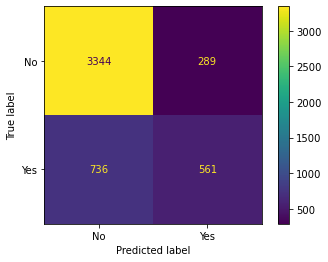



Confusion matrix for the test set
[[1420  340]
 [ 121  232]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


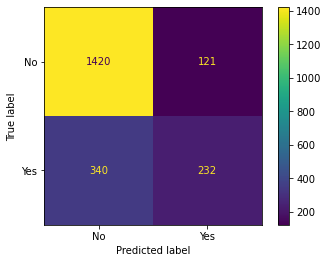

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#from sklearn.tree import DecisionTreeClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

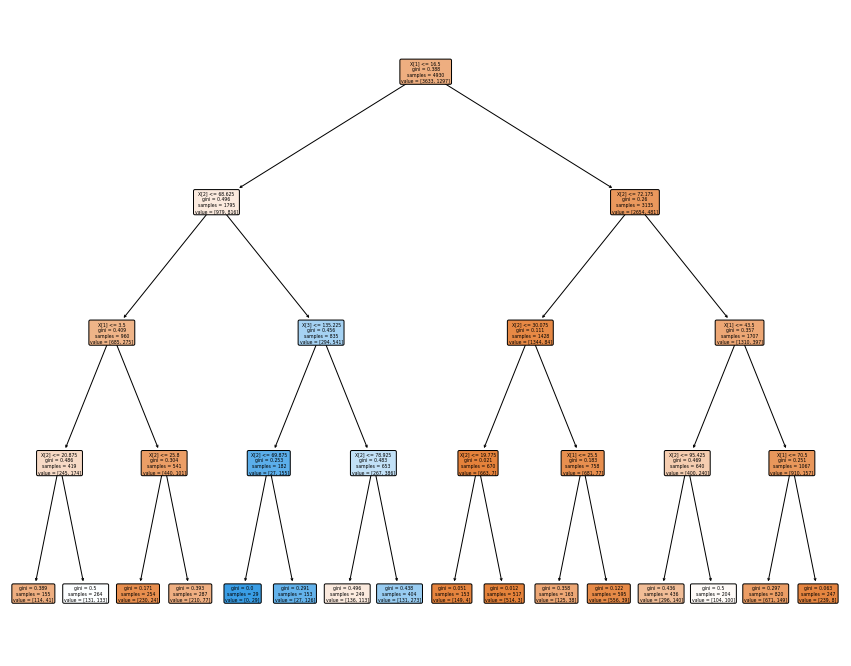

In [46]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,12))

plot_tree(dt,filled = True, rounded=True)
plt.show() 


# Working on numerical and categorical data

In [47]:
churnData

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


## Split cat and numerical

In [48]:
categorical = churnData.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


## Turn categorical variables into dummies 

In [49]:

categorical_cols = pd.get_dummies(categorical.iloc[:,:-1], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Cross validation 

In [50]:
X = pd.concat([numerical, categorical_cols], axis= 1)
y = churnData.iloc[:,-1]

In [51]:
model = DecisionTreeClassifier(max_depth=3,max_features=18, random_state= 123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [52]:
scores = cross_val_score(model, X_train, y_train, cv=10)
scores

array([0.78498986, 0.78701826, 0.80527383, 0.78498986, 0.78296146,
       0.76673428, 0.79107505, 0.78296146, 0.76673428, 0.80527383])

In [53]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.01


In [54]:
y_test

6625    Yes
5975    Yes
6891     No
1681     No
4780     No
       ... 
6143     No
4257     No
4590     No
842     Yes
1864     No
Name: churn, Length: 2113, dtype: object

In [55]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

## Decision Tree

,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


Confusion matrix for the train set
[[3339  756]
 [ 294  541]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


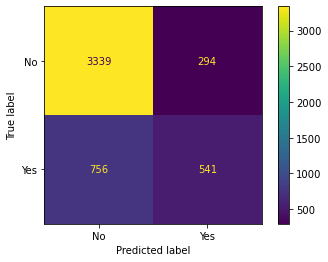



Confusion matrix for the test set
[[1433  360]
 [ 108  212]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


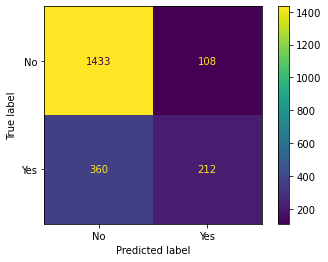

In [56]:
dt = DecisionTreeClassifier(max_depth=3,max_features=18, random_state= 123)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

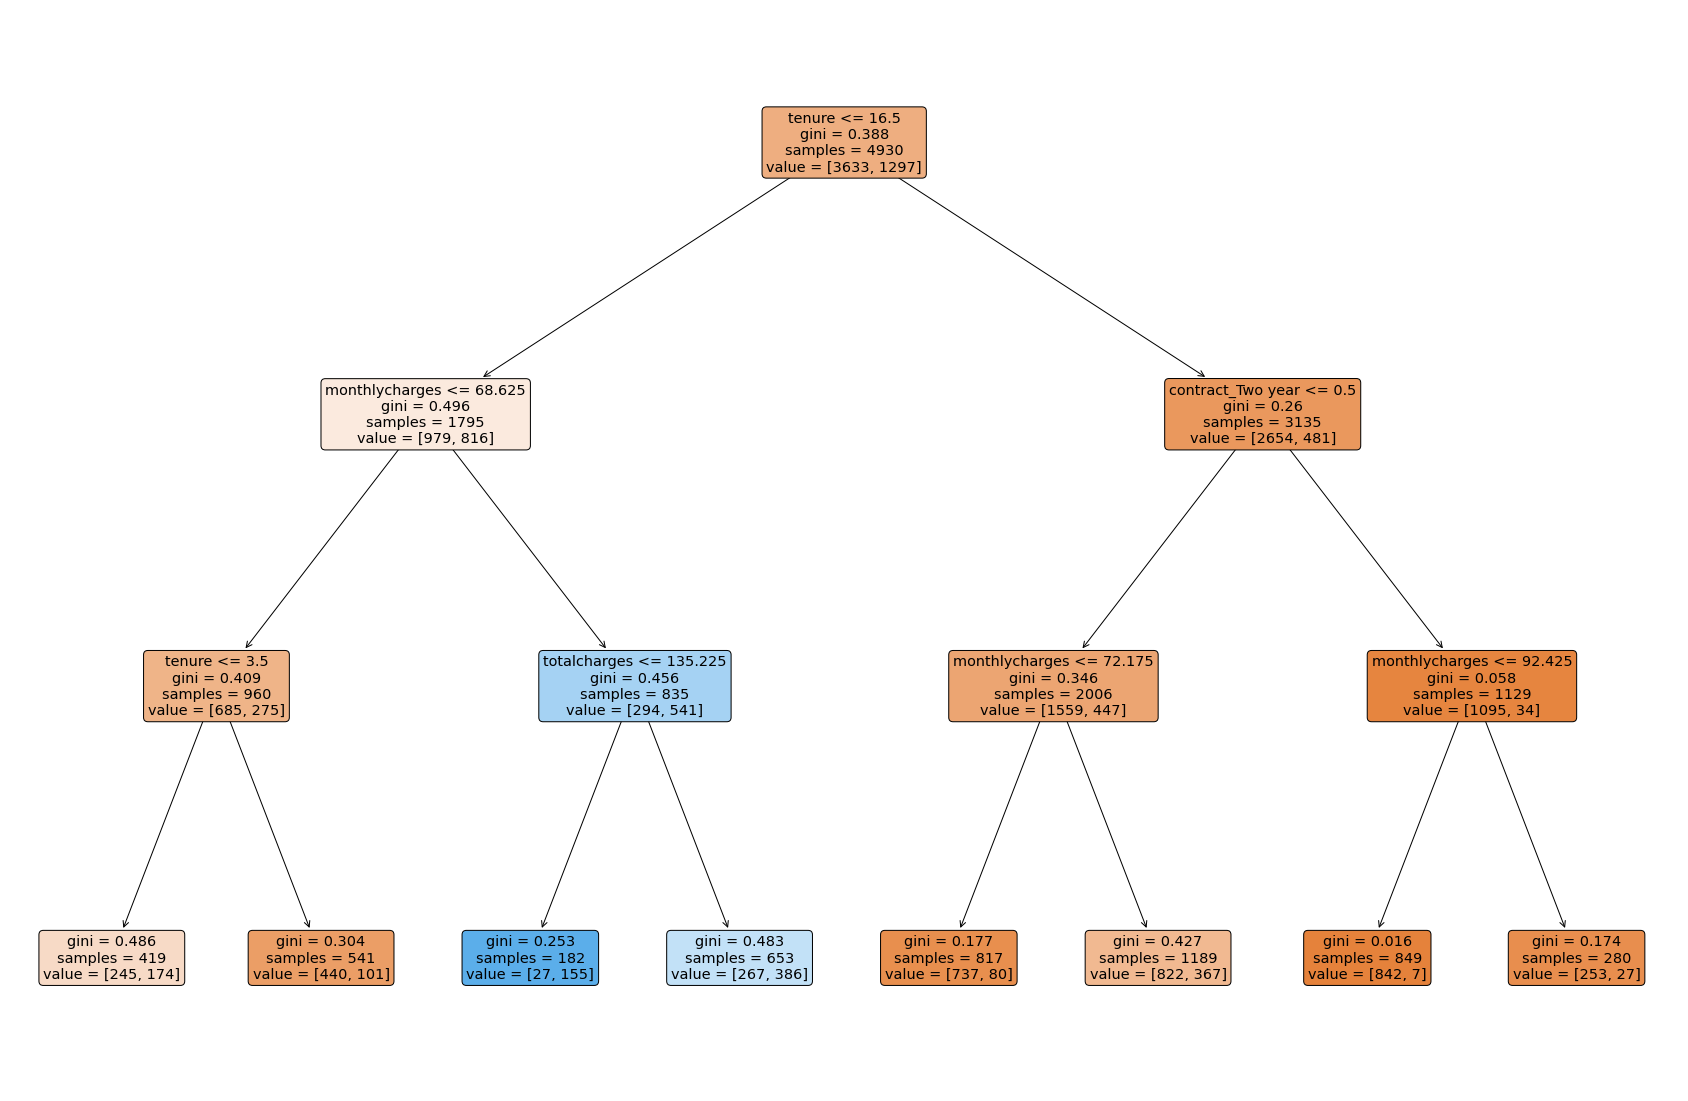

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,20))

plot_tree(dt,filled = True, rounded=True, feature_names=X.columns) # featurenames=x.columns
plt.show() 


### Feature importance

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


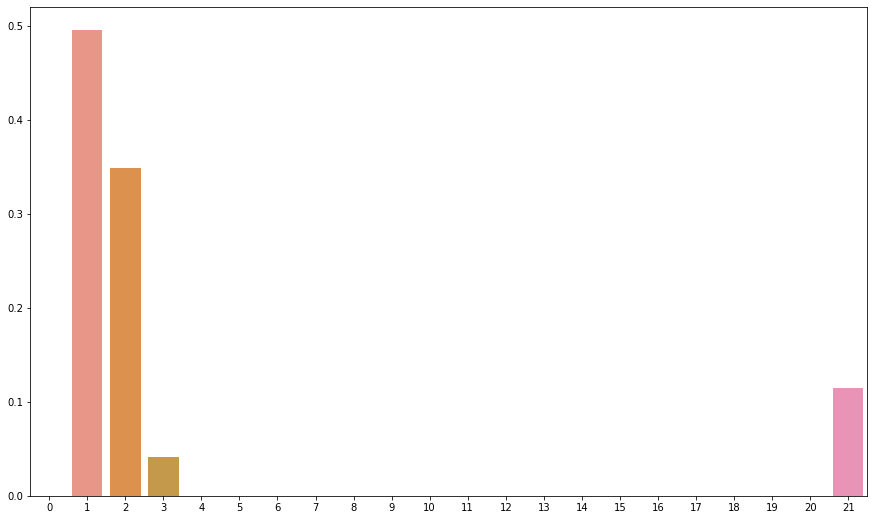

In [58]:
#plot = sns.barplot(list(range(22)),dt.feature_importances_)
#plt.gcf().set_size_inches(15,9)

# Handling Imbalance

In [59]:
churnData['churn'] = churnData['churn'].apply(lambda x: 0 if x == 'No' else 1)

## Downsampling

In [60]:
#split in classes 
category_0 = churnData[churnData['churn'] == 0]
category_1 = churnData[churnData['churn'] == 1]

In [61]:
category_0

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.40,0
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0


In [62]:
category_1

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
5,Female,0,No,No,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.50,1
8,Female,0,Yes,No,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,1
13,Male,0,No,No,49,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,No,No,Yes,Yes,No,One year,59.80,727.80,1
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,44.20,403.35,1
7032,Male,1,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,75.75,75.75,1
7034,Female,0,No,No,67,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,102.95,6886.25,1


In [63]:
print(category_0.shape)
print(category_1.shape)

(5174, 16)
(1869, 16)


In [64]:
category_0_down = category_0.sample(len(category_1,))
print(category_0_down.shape)
print(category_1.shape)

(1869, 16)
(1869, 16)


In [65]:
churn_down = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
churn_down = churn_down.sample(frac=1)
churn_down['churn'].value_counts()

0    1869
1    1869
Name: churn, dtype: int64

### On data set with only num features

In [66]:
X = churn_down.select_dtypes(np.number).iloc[:,:-1]
y = churn_down.iloc[:,-1]

In [67]:
X

,seniorcitizen,tenure,monthlycharges,totalcharges
616,0,8,25.25,186.30
4950,0,4,91.65,365.40
5895,0,39,59.85,2341.50
6443,0,9,19.50,150.35
1383,0,1,49.95,49.95
...,...,...,...,...
3479,0,4,45.30,196.95
3746,0,1,68.95,68.95
4800,1,1,94.00,94.00
1378,0,58,66.80,3970.40


In [68]:
y

616     0
4950    1
5895    0
6443    0
1383    1
       ..
3479    1
3746    1
4800    1
1378    0
3260    1
Name: churn, Length: 3738, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Log

In [70]:
std_scaler = StandardScaler().fit(X_train) 
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.733445,0.700535
1,Precision,0.720945,0.695980
2,Recall,0.758227,0.728947


Confusion matrix for the train set
[[1064  437]
 [ 360 1129]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


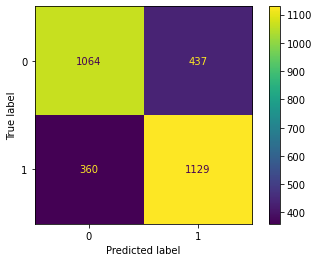



Confusion matrix for the test set
[[247 121]
 [103 277]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


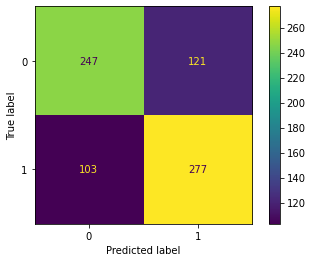

In [71]:
trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

### KNN

In [72]:
trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.811037,0.676471
1,Precision,0.806366,0.673367
2,Recall,0.816655,0.705263


Confusion matrix for the train set
[[1209  292]
 [ 273 1216]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


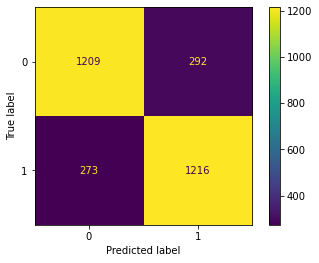



Confusion matrix for the test set
[[247 121]
 [103 277]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


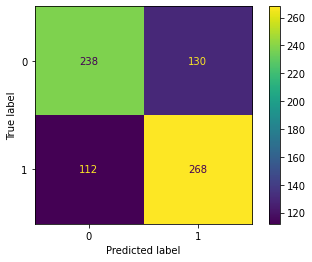

In [73]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

### Decision Tree

,Error_metric,Train,Test
0,Accuracy,0.730769,0.719251
1,Precision,0.713750,0.708333
2,Recall,0.766958,0.760526


Confusion matrix for the train set
[[1043  347]
 [ 458 1142]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


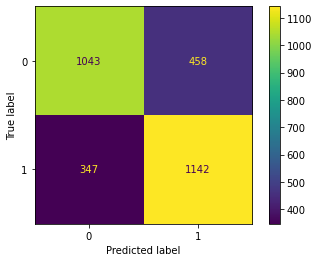



Confusion matrix for the test set
[[249  91]
 [119 289]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


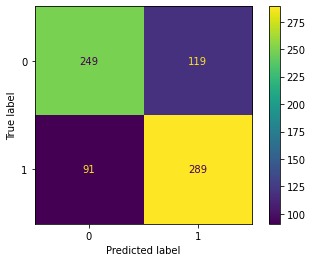

In [74]:
dt = DecisionTreeClassifier(max_depth=3, random_state= 123)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

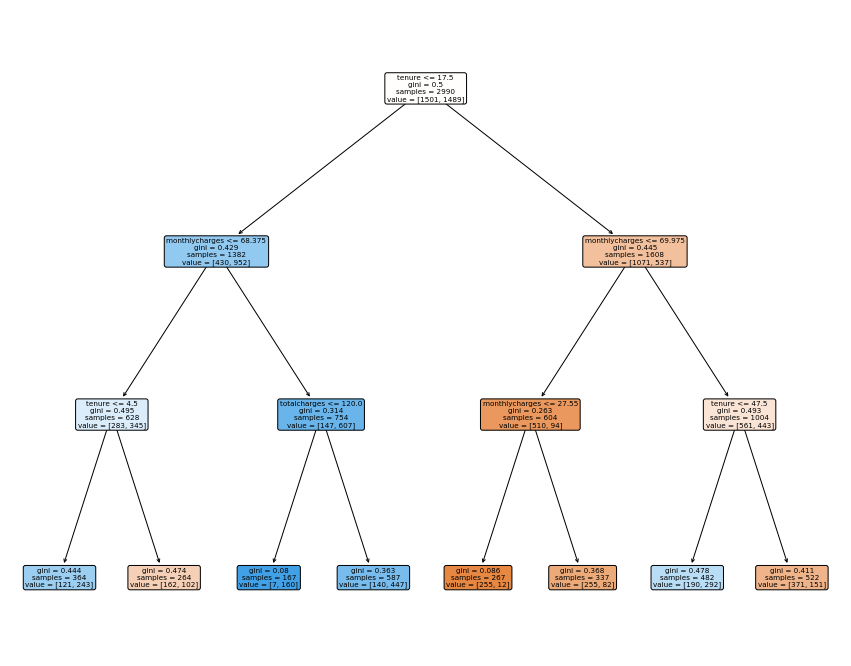

In [75]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,12))

plot_tree(dt,filled = True, rounded=True,feature_names=X_train.columns)
plt.show() 


### Rndom forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8792642140468228
0.7245989304812834


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## On data set with num & cat features

In [77]:
categorical = churn_down.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract
616,Male,No,No,No,No,No,No,No,No,No,Month-to-month
4950,Female,Yes,No,Yes,No,Yes,No,No,Yes,No,Month-to-month
5895,Female,Yes,Yes,Yes,No,No,Yes,No,Yes,No,Month-to-month
6443,Female,No,No,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month
1383,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
3479,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
3746,Female,Yes,No,Yes,No,No,No,No,No,No,Month-to-month
4800,Male,No,No,Yes,No,No,No,No,Yes,Yes,Month-to-month
1378,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Month-to-month


In [78]:
categorical_cols = pd.get_dummies(categorical.iloc[:,:], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
616,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4950,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5895,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6443,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0
1383,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3746,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4800,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1378,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [79]:
X3 = pd.concat([X,categorical_cols],axis=1)

In [80]:
X3

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
616,0,8,25.25,186.30,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4950,0,4,91.65,365.40,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5895,0,39,59.85,2341.50,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
6443,0,9,19.50,150.35,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0
1383,0,1,49.95,49.95,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3479,0,4,45.30,196.95,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3746,0,1,68.95,68.95,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,1,1,94.00,94.00,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1378,0,58,66.80,3970.40,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### Decision Tree

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.20)
dt = DecisionTreeClassifier(max_depth=3, random_state= 123)

,Error_metric,Train,Test
0,Accuracy,0.721070,0.729947
1,Precision,0.663934,0.683810
2,Recall,0.879240,0.908861


Confusion matrix for the train set
[[ 860  178]
 [ 656 1296]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


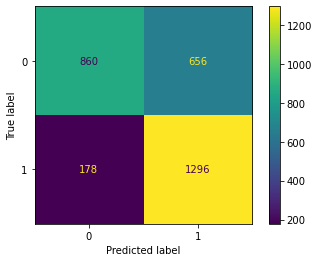



Confusion matrix for the test set
[[187  36]
 [166 359]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


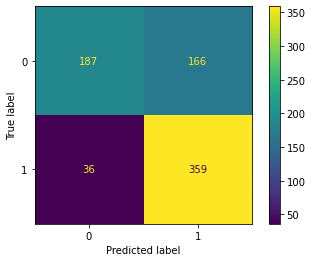

In [82]:
dt = DecisionTreeClassifier(max_depth=3, random_state= 123)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

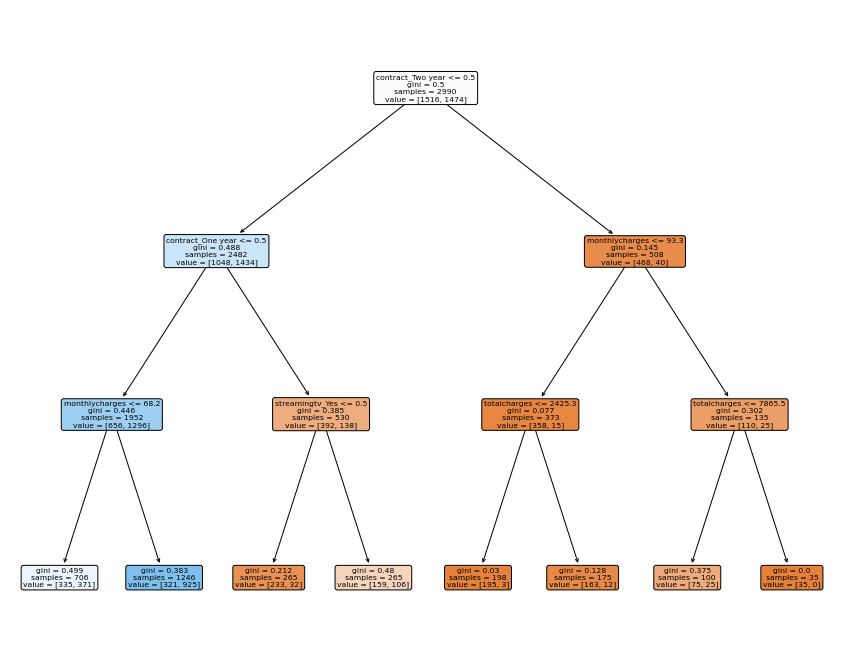

In [83]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,12))

plot_tree(dt,filled = True, rounded=True,feature_names=X_train.columns)
plt.show() 

### Feature importance 

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


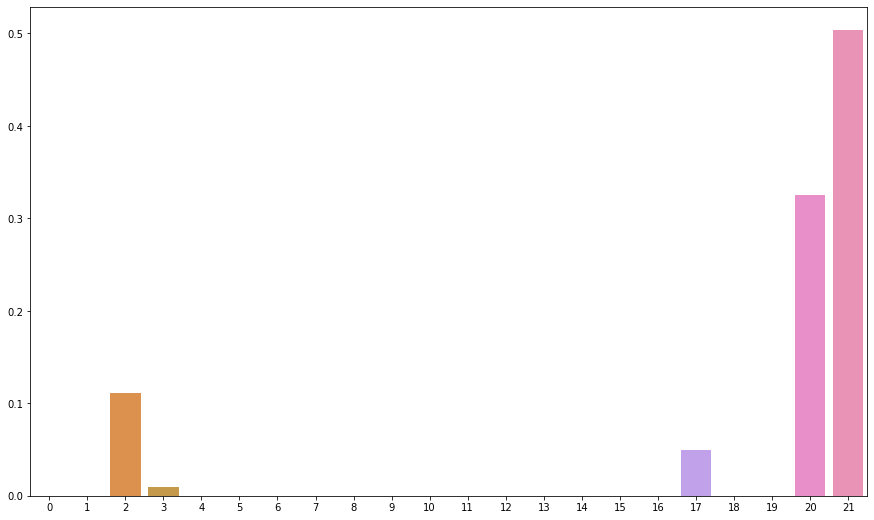

In [85]:
plot = sns.barplot(list(range(22)), dt.feature_importances_)
plt.gcf().set_size_inches(15,9)

### Random forest

In [86]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8842809364548495
0.7620320855614974


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Upsampling (with SMOTE)

### Only on numerical features

In [87]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [88]:
X = numerical

X

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [89]:
y = churnData.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [90]:
y.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [91]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

#### Logistic regression

In [92]:
X= X_sm
y= y_sm

In [93]:
y

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: churn, Length: 10348, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [95]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.734598,0.728019
1,Precision,0.720285,0.722523
2,Recall,0.762448,0.758751


Confusion matrix for the train set
[[2942 1219]
 [ 978 3139]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


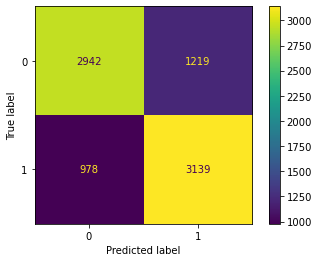



Confusion matrix for the test set
[[705 308]
 [255 802]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


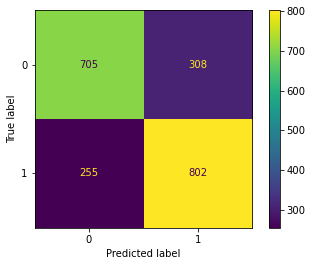

In [96]:
trans.fit(X_train_scaled)

X_train_mod = trans.transform(X_train_scaled)
X_test_mod  = trans.transform(X_test_scaled)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

#### KNN

In [97]:
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)

,Error_metric,Train,Test
0,Accuracy,0.877023,0.759420
1,Precision,0.843799,0.741573
2,Recall,0.923731,0.811731


Confusion matrix for the train set
[[3457  704]
 [ 314 3803]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


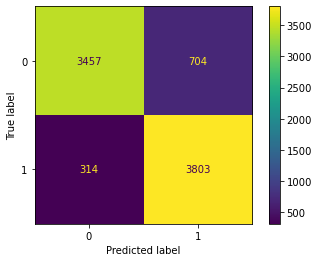



Confusion matrix for the test set
[[705 308]
 [255 802]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


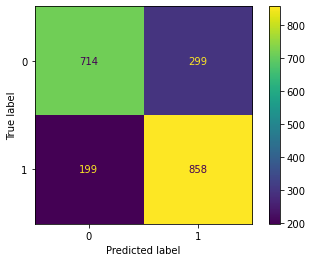

In [98]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

#### Decision Tree

,Error_metric,Train,Test
0,Accuracy,0.740879,0.731884
1,Precision,0.716703,0.715636
2,Recall,0.792082,0.788079


Confusion matrix for the train set
[[2872  856]
 [1289 3261]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


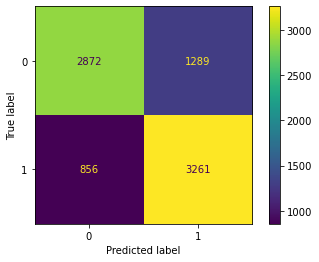



Confusion matrix for the test set
[[682 224]
 [331 833]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


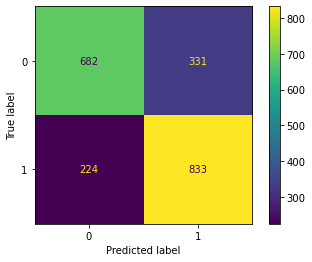

In [99]:
dt = DecisionTreeClassifier(max_depth=3, random_state= 123)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

#### Random forest

In [100]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8517757912539261
0.770048309178744


### Numerical & categorical features "upsampled"

In [101]:
# Using upsampling method(not SMOTE)

#### Decision tree

,Error_metric,Train,Test
0,Accuracy,0.740879,0.731884
1,Precision,0.716703,0.715636
2,Recall,0.792082,0.788079


Confusion matrix for the train set
[[2872  856]
 [1289 3261]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


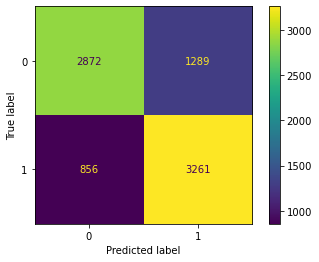



Confusion matrix for the test set
[[682 224]
 [331 833]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


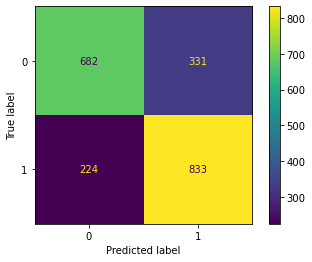

In [102]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

## On data set wit cat & num

In [103]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 16)


In [104]:
print(category_1_up.shape)
print(category_0.shape)

(5174, 16)
(5174, 16)


In [105]:
churn_up = pd.concat([category_1_up, category_0], axis=0)
churn_up

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
4386,Male,0,Yes,Yes,55,Yes,Yes,Yes,No,Yes,No,No,Two year,57.55,3046.40,1
660,Female,0,No,No,4,No,No,No,No,No,No,No,Month-to-month,24.25,96.05,1
3428,Male,1,Yes,No,51,Yes,Yes,No,Yes,No,Yes,No,Month-to-month,93.80,4750.95,1
5942,Female,0,Yes,No,9,No,No,No,Yes,No,Yes,Yes,Month-to-month,48.75,442.20,1
1519,Female,0,No,No,2,No,Yes,Yes,No,No,No,Yes,Month-to-month,42.60,72.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0


In [106]:
#shuffling the data
churn_up = churn_up.sample(frac=1)
churn_up.churn.value_counts()

0    5174
1    5174
Name: churn, dtype: int64

In [107]:
X = churn_up.select_dtypes(np.number).iloc[:,:-1]
X

,seniorcitizen,tenure,monthlycharges,totalcharges
6303,0,71,109.25,7707.70
4524,0,23,99.25,2186.40
981,0,40,19.60,808.95
5126,0,57,103.05,5925.75
1719,0,3,107.95,318.60
...,...,...,...,...
5079,0,15,95.70,1451.10
3045,0,48,65.65,3094.65
5470,1,71,89.45,6435.25
5589,0,46,54.35,2460.15


In [108]:
categorical = churn_up.select_dtypes(include = object)
categorical

,gender,partner,dependents,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract
6303,Female,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Two year
4524,Male,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month
981,Male,Yes,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year
5126,Male,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Month-to-month
1719,Male,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
5079,Male,No,No,Yes,No,Yes,No,Yes,No,Yes,Month-to-month
3045,Female,Yes,No,Yes,No,Yes,Yes,No,No,Yes,One year
5470,Female,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Two year
5589,Female,No,No,Yes,No,No,Yes,Yes,No,No,Two year


In [109]:
categorical_cols = pd.get_dummies(categorical.iloc[:,:], drop_first=True)
categorical_cols

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
6303,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1
4524,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0
981,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1
5126,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
1719,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3045,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0
5470,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
5589,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [110]:
X = churn_up.select_dtypes(np.number).iloc[:,:-1]
X

,seniorcitizen,tenure,monthlycharges,totalcharges
6303,0,71,109.25,7707.70
4524,0,23,99.25,2186.40
981,0,40,19.60,808.95
5126,0,57,103.05,5925.75
1719,0,3,107.95,318.60
...,...,...,...,...
5079,0,15,95.70,1451.10
3045,0,48,65.65,3094.65
5470,1,71,89.45,6435.25
5589,0,46,54.35,2460.15


In [111]:
X4 = pd.concat([X,categorical_cols],axis=1)
X4

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
6303,0,71,109.25,7707.70,0,1,0,1,0,0,...,0,1,0,1,0,1,0,1,0,1
4524,0,23,99.25,2186.40,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
981,0,40,19.60,808.95,1,1,1,1,1,0,...,1,0,1,0,1,0,1,0,0,1
5126,0,57,103.05,5925.75,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
1719,0,3,107.95,318.60,1,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,0,15,95.70,1451.10,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3045,0,48,65.65,3094.65,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
5470,1,71,89.45,6435.25,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
5589,0,46,54.35,2460.15,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [112]:
y = churn_up.iloc[:,-1]
y

6303    0
4524    1
981     0
5126    0
1719    0
       ..
5079    0
3045    0
5470    0
5589    1
6899    1
Name: churn, Length: 10348, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.20)
dt = DecisionTreeClassifier(max_depth=5)

### Random forest

In [114]:
X_train

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
6104,0,4,23.90,97.50,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0
6549,0,1,56.25,56.25,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4886,0,7,19.90,173.15,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,1,0
5605,0,10,60.20,563.50,1,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
838,0,36,79.20,2854.95,1,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,2,30.90,59.05,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5765,1,68,96.55,6581.90,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
5016,0,5,19.85,108.05,0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0
4333,0,31,90.55,2929.75,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=100,bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8778690504952887
0.8415458937198068


In [116]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200, 500],
    'max_depth': [8, 10],
    'max_features': ['sqrt', 'log2']

    }
clf = RandomForestClassifier(random_state=100)


In [117]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [118]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True)

In [119]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

In [121]:
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=200, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8784730611258759
0.8478260869565217


In [122]:
#Calculating the mean of  
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=10,max_features="sqrt",n_estimators=200, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.8268863653622605


In [123]:
clf.fit( X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200,
                       random_state=0)

In [124]:
len(X_train.columns)

22

### Feature importance

In [125]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [126]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
1,tenure,0.187512
3,totalcharges,0.167278
2,monthlycharges,0.145935
21,contract_Two year,0.117806
20,contract_One year,0.046514
9,onlinesecurity_Yes,0.040337
15,techsupport_Yes,0.039330
16,streamingtv_No internet service,0.025796
18,streamingmovies_No internet service,0.024032
12,deviceprotection_No internet service,0.023924


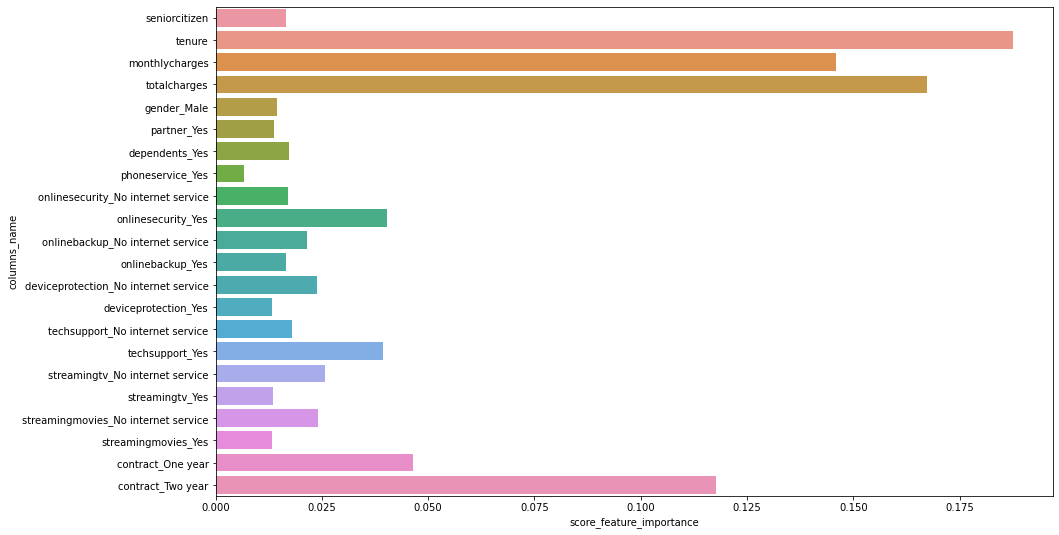

In [127]:
plot= sns.barplot(x=df.score_feature_importance, y=df.columns_name)
plt.gcf().set_size_inches(15,9)

In [2]:
import pandas as pd
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
type(churnData)

pandas.core.frame.DataFrame